In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from io import StringIO
import math
import numpy as np

## Import Data

In [3]:
with open("msd_genre_dataset.txt", 'r') as f:
    lines = f.readlines()

# Find the header line (starts with '%')
header_line = [line for line in lines if line.startswith('%')][0]
columns = header_line.strip('% \n').split(',')

# Load the rest (skip comments)
data_lines = [line for line in lines if not line.startswith(('#', '%'))]

# Parse into DataFrame
label_data = pd.read_csv(StringIO(''.join(data_lines)), names=columns)
display(label_data)

,genre,track_id,artist_name,title,loudness,tempo,time_signature,key,mode,duration,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
0,% - one line after comments,column names,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,- rest is data,comma-separated,one line per song,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,classic pop and rock,TRFCOOU128F427AEC0,Blue Oyster Cult,Mes Dames Sarat,-8.697,155.007,1.0,9.0,1.0,246.33424,...,1255.514569,580.030472,598.485223,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011
3,classic pop and rock,TRNJTPB128F427AE9F,Blue Oyster Cult,Screams,-10.659,148.462,1.0,4.0,0.0,189.80526,...,2007.653070,1043.474073,585.694981,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525
4,classic pop and rock,TRLFJHA128F427AEEA,Blue Oyster Cult,Dance The Night Away,-13.494,112.909,1.0,10.0,0.0,158.19710,...,1204.856777,2736.520024,730.233239,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59597,soul and reggae,TRGYRMA128E078FC55,Erykah Badu,Danger,-10.162,88.951,4.0,11.0,1.0,348.96934,...,4339.425990,4081.017023,1248.530483,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718
59598,soul and reggae,TRZZFQW128E078FC5A,Erykah Badu,Hollywood,-5.466,130.615,3.0,9.0,1.0,332.32934,...,3759.486850,3703.892394,1413.063618,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794
59599,soul and reggae,TRAMYBB128F424D86D,Erykah Badu,Think Twice,-9.494,88.976,4.0,3.0,1.0,182.04689,...,4288.018243,3694.070826,1336.559501,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934
59600,soul and reggae,TRABWFM128F424D86A,Erykah Badu / Dead Prez,The Grind,-7.617,67.929,3.0,0.0,1.0,169.42975,...,2846.537149,3655.514437,1811.926034,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807


In [4]:
label_data.shape

(59602, 34)

In [5]:
label_data.to_csv('msd_genre_dataset.csv', index=False)

## Exploratory Data Analysis (EDA) 

In [6]:
label_data.columns

Index(['genre', 'track_id', 'artist_name', 'title', 'loudness', 'tempo',
       'time_signature', 'key', 'mode', 'duration', 'avg_timbre1',
       'avg_timbre2', 'avg_timbre3', 'avg_timbre4', 'avg_timbre5',
       'avg_timbre6', 'avg_timbre7', 'avg_timbre8', 'avg_timbre9',
       'avg_timbre10', 'avg_timbre11', 'avg_timbre12', 'var_timbre1',
       'var_timbre2', 'var_timbre3', 'var_timbre4', 'var_timbre5',
       'var_timbre6', 'var_timbre7', 'var_timbre8', 'var_timbre9',
       'var_timbre10', 'var_timbre11', 'var_timbre12'],
      dtype='object')

### Predictor Variables

In [7]:
timbre_mean_cols = [f'avg_timbre{i}' for i in range(1, 13)]
timbre_var_cols  = [f'var_timbre{i}' for i in range(1, 13)]

numeric_features = ['tempo','duration','loudness'] + timbre_mean_cols + timbre_var_cols
categorical_features = ['key','time_signature','mode']

if numeric_features:
    display(label_data[numeric_features].describe().T)

,count,mean,std,min,25%,50%,75%,max
tempo,59600.0,122.644482,35.026345,0.000000,97.593750,120.008000,142.873000,260.547000
duration,59600.0,249.368358,124.893946,0.809340,180.923630,228.675460,287.790570,2873.808530
loudness,59600.0,-11.466464,5.443875,-54.352000,-14.082000,-10.491000,-7.584000,2.865000
avg_timbre1,59600.0,41.271798,6.464746,1.749000,37.804325,42.188843,45.824781,58.011152
avg_timbre2,59600.0,-7.839749,53.460157,-318.656281,-38.164928,-2.521511,28.638475,448.373214
avg_timbre3,59600.0,8.693922,37.083264,-257.525596,-13.297080,10.010756,31.275820,305.121388
avg_timbre4,59600.0,0.673991,16.630815,-120.723153,-9.371414,-0.521686,9.248637,197.754968
avg_timbre5,59600.0,-2.136287,23.433172,-149.894040,-15.925495,-2.003674,11.288953,223.496056
avg_timbre6,59600.0,-6.909147,12.444327,-73.029843,-15.108996,-7.950652,0.093292,111.684506
avg_timbre7,59600.0,-4.124408,14.965668,-165.322686,-12.731492,-3.795512,4.996712,133.663628


In [8]:
label_data = label_data.dropna(subset=numeric_features).reset_index(drop=True) # only two rows with missing numeric features

In [9]:
label_data = label_data.dropna(subset=categorical_features).reset_index(drop=True) # no rows with missing categorical features

In [10]:
label_data = label_data.dropna(subset=['genre']).reset_index(drop=True) # no rows with missing genre features

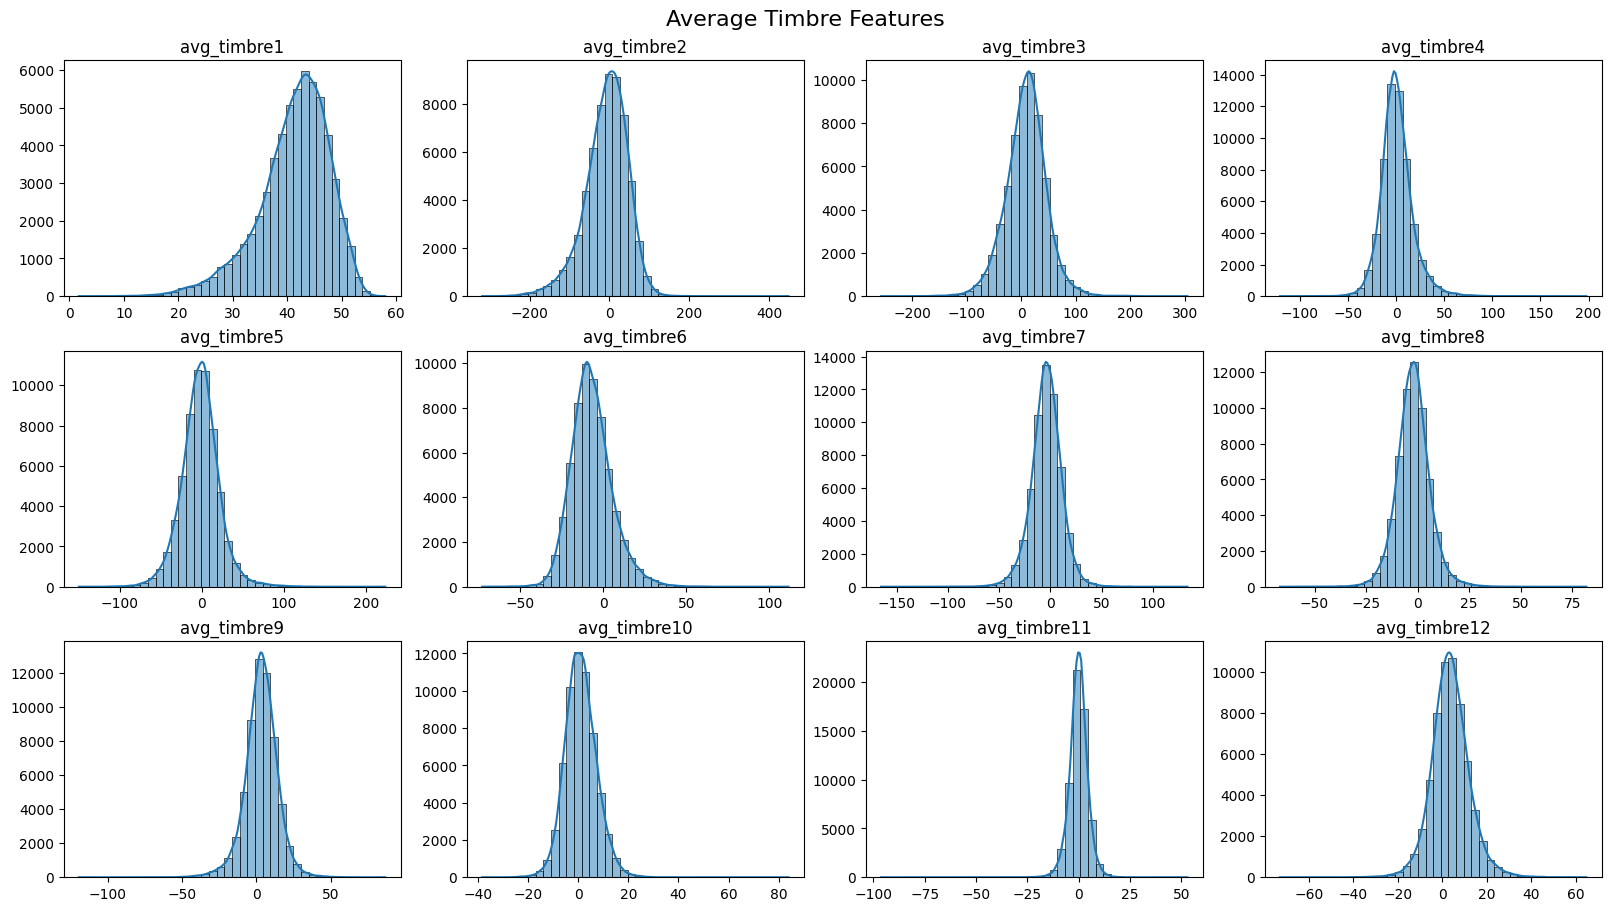

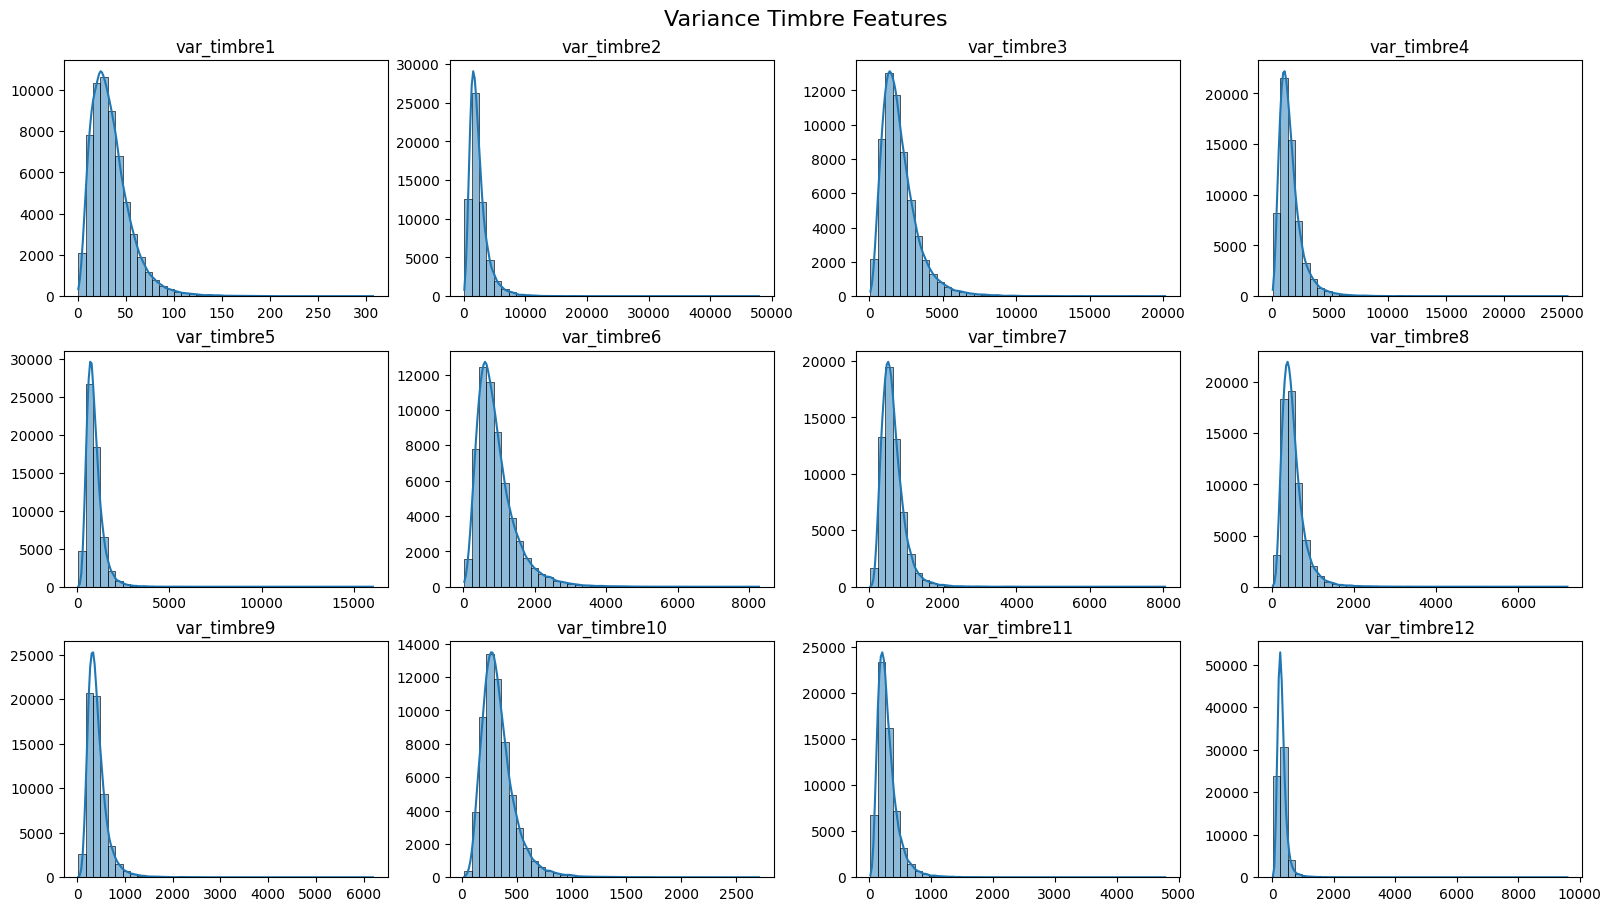

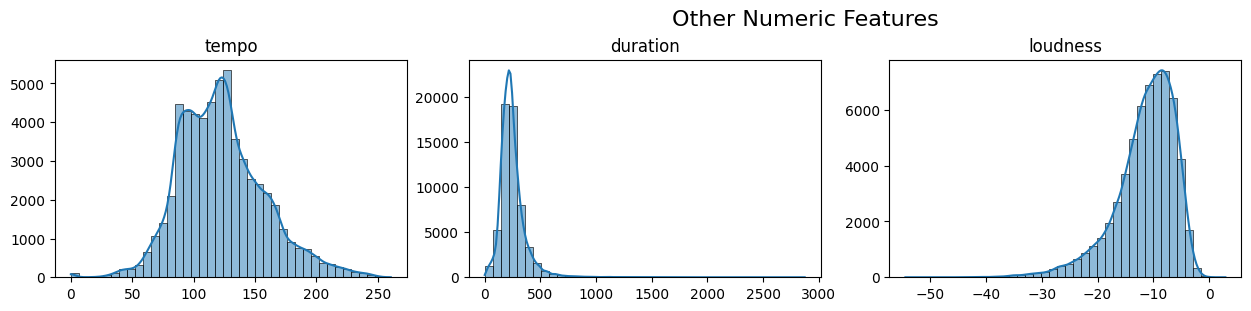

In [11]:
def plot_timbre_grid(df, cols, title_prefix, n_cols=4):
    n_feats = len(cols)
    n_rows = math.ceil(n_feats / n_cols)

    fig, axes = plt.subplots(n_rows, n_cols,
                             figsize=(4 * n_cols, 3 * n_rows),
                             constrained_layout=True)

    axes = axes.ravel()

    for ax, col in zip(axes, cols):
        sns.histplot(df[col].dropna(), kde=True,
                     bins=40, ax=ax)
        ax.set_title(col)
        ax.set_xlabel("")
        ax.set_ylabel("")

    for ax in axes[len(cols):]:
        ax.set_visible(False)

    fig.suptitle(title_prefix, fontsize=16)
    plt.show()

# avg_timbre1~12
plot_timbre_grid(label_data, timbre_mean_cols, "Average Timbre Features")

# var_timbre1~12
plot_timbre_grid(label_data, timbre_var_cols, "Variance Timbre Features")

# other numeric features
plot_timbre_grid(label_data, ['tempo', 'duration', 'loudness'], "Other Numeric Features")

In [12]:
corr = label_data[numeric_features].corr()
corr

,tempo,duration,loudness,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
tempo,1.000000,-0.040001,0.175129,0.198828,0.154764,-0.002386,0.091348,-0.124590,-0.034515,0.080811,...,-0.135278,-0.127931,-0.140284,-0.034158,-0.141890,-0.090115,-0.148271,-0.073349,-0.071398,-0.129743
duration,-0.040001,1.000000,-0.058163,-0.099041,-0.029572,-0.124851,0.063544,0.048852,-0.170657,0.073230,...,0.187233,-0.027275,0.110584,0.004449,0.052190,-0.031076,0.023573,-0.043777,-0.039272,0.067888
loudness,0.175129,-0.058163,1.000000,0.952330,0.554533,0.100869,0.229484,-0.309861,-0.008869,0.226318,...,-0.248710,-0.125162,-0.256736,0.007437,-0.286195,-0.095240,-0.384401,-0.047954,0.020411,-0.344520
avg_timbre1,0.198828,-0.099041,0.952330,1.000000,0.553137,0.215163,0.134768,-0.344319,-0.137230,0.205624,...,-0.396504,-0.324127,-0.362038,-0.205557,-0.391729,-0.266156,-0.448167,-0.216456,-0.170258,-0.386586
avg_timbre2,0.154764,-0.029572,0.554533,0.553137,1.000000,0.060625,0.204040,-0.245187,-0.014125,0.156516,...,-0.138679,-0.087251,-0.160234,0.013395,-0.166891,-0.078585,-0.303606,-0.036545,0.044227,-0.252140
avg_timbre3,-0.002386,-0.124851,0.100869,0.215163,0.060625,1.000000,0.274026,-0.045722,0.062276,-0.048712,...,-0.146440,-0.261944,-0.076051,-0.367151,-0.052077,-0.347489,0.009217,-0.336206,-0.260797,0.060631
avg_timbre4,0.091348,0.063544,0.229484,0.134768,0.204040,0.274026,1.000000,-0.037591,0.342183,0.302505,...,0.201184,0.283666,0.092344,0.470114,0.090110,0.202114,-0.030417,0.218916,0.369093,0.013735
avg_timbre5,-0.124590,0.048852,-0.309861,-0.344319,-0.245187,-0.045722,-0.037591,1.000000,-0.070424,-0.171427,...,0.228892,0.186082,0.203765,0.085806,0.307144,0.170684,0.236849,0.165658,0.111038,0.304812
avg_timbre6,-0.034515,-0.170657,-0.008869,-0.137230,-0.014125,0.062276,0.342183,-0.070424,1.000000,-0.169835,...,0.205290,0.545625,0.135280,0.649545,0.247615,0.445161,0.193738,0.531918,0.622857,0.106501
avg_timbre7,0.080811,0.073230,0.226318,0.205624,0.156516,-0.048712,0.302505,-0.171427,-0.169835,1.000000,...,0.031389,-0.055568,-0.057524,0.077024,-0.063894,-0.025966,-0.132837,0.004177,0.001018,-0.115481


In [13]:
corr

,tempo,duration,loudness,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,...,var_timbre3,var_timbre4,var_timbre5,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12
tempo,1.000000,-0.040001,0.175129,0.198828,0.154764,-0.002386,0.091348,-0.124590,-0.034515,0.080811,...,-0.135278,-0.127931,-0.140284,-0.034158,-0.141890,-0.090115,-0.148271,-0.073349,-0.071398,-0.129743
duration,-0.040001,1.000000,-0.058163,-0.099041,-0.029572,-0.124851,0.063544,0.048852,-0.170657,0.073230,...,0.187233,-0.027275,0.110584,0.004449,0.052190,-0.031076,0.023573,-0.043777,-0.039272,0.067888
loudness,0.175129,-0.058163,1.000000,0.952330,0.554533,0.100869,0.229484,-0.309861,-0.008869,0.226318,...,-0.248710,-0.125162,-0.256736,0.007437,-0.286195,-0.095240,-0.384401,-0.047954,0.020411,-0.344520
avg_timbre1,0.198828,-0.099041,0.952330,1.000000,0.553137,0.215163,0.134768,-0.344319,-0.137230,0.205624,...,-0.396504,-0.324127,-0.362038,-0.205557,-0.391729,-0.266156,-0.448167,-0.216456,-0.170258,-0.386586
avg_timbre2,0.154764,-0.029572,0.554533,0.553137,1.000000,0.060625,0.204040,-0.245187,-0.014125,0.156516,...,-0.138679,-0.087251,-0.160234,0.013395,-0.166891,-0.078585,-0.303606,-0.036545,0.044227,-0.252140
avg_timbre3,-0.002386,-0.124851,0.100869,0.215163,0.060625,1.000000,0.274026,-0.045722,0.062276,-0.048712,...,-0.146440,-0.261944,-0.076051,-0.367151,-0.052077,-0.347489,0.009217,-0.336206,-0.260797,0.060631
avg_timbre4,0.091348,0.063544,0.229484,0.134768,0.204040,0.274026,1.000000,-0.037591,0.342183,0.302505,...,0.201184,0.283666,0.092344,0.470114,0.090110,0.202114,-0.030417,0.218916,0.369093,0.013735
avg_timbre5,-0.124590,0.048852,-0.309861,-0.344319,-0.245187,-0.045722,-0.037591,1.000000,-0.070424,-0.171427,...,0.228892,0.186082,0.203765,0.085806,0.307144,0.170684,0.236849,0.165658,0.111038,0.304812
avg_timbre6,-0.034515,-0.170657,-0.008869,-0.137230,-0.014125,0.062276,0.342183,-0.070424,1.000000,-0.169835,...,0.205290,0.545625,0.135280,0.649545,0.247615,0.445161,0.193738,0.531918,0.622857,0.106501
avg_timbre7,0.080811,0.073230,0.226318,0.205624,0.156516,-0.048712,0.302505,-0.171427,-0.169835,1.000000,...,0.031389,-0.055568,-0.057524,0.077024,-0.063894,-0.025966,-0.132837,0.004177,0.001018,-0.115481


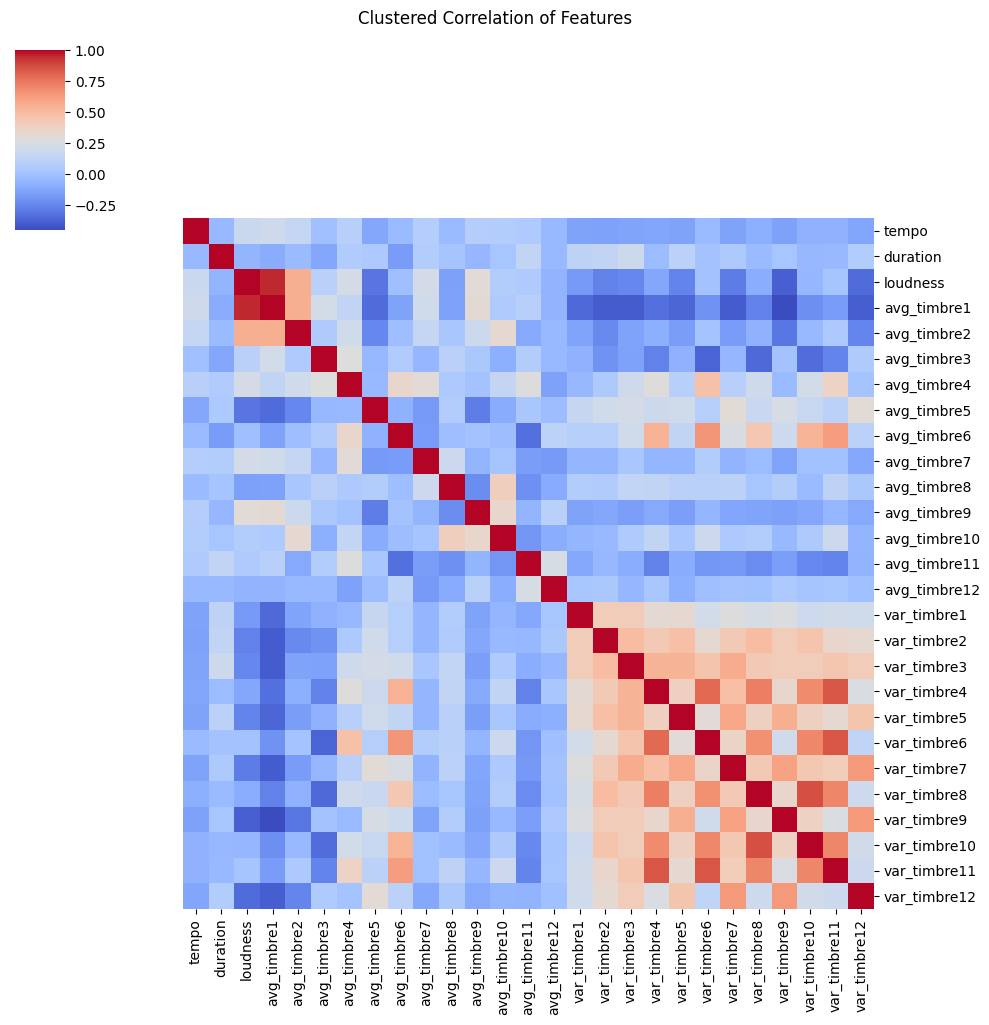

In [14]:
corr = label_data[numeric_features].corr()

g = sns.clustermap(corr,
                   cmap="coolwarm",
                   figsize=(10, 10),
                   col_cluster=False,
                   row_cluster=False
                   )

g.fig.suptitle("Clustered Correlation of Features", y=1.02)
plt.show()

Here because loudness is highly related with avg_timbre1, we decided to remove loudness from our selected predictors. From the doc, we learned that the first timbre component in the MSD is strongly influenced by overall signal energy (i.e., loudness). This is why it shows extremely high correlation with loudness (r ≈ 0.95). The remaining timbre components capture the actual spectral–timbre structure. Therefore, loudness is removed to avoid multicollinearity.

In [15]:
categorical_features

['key', 'time_signature', 'mode']

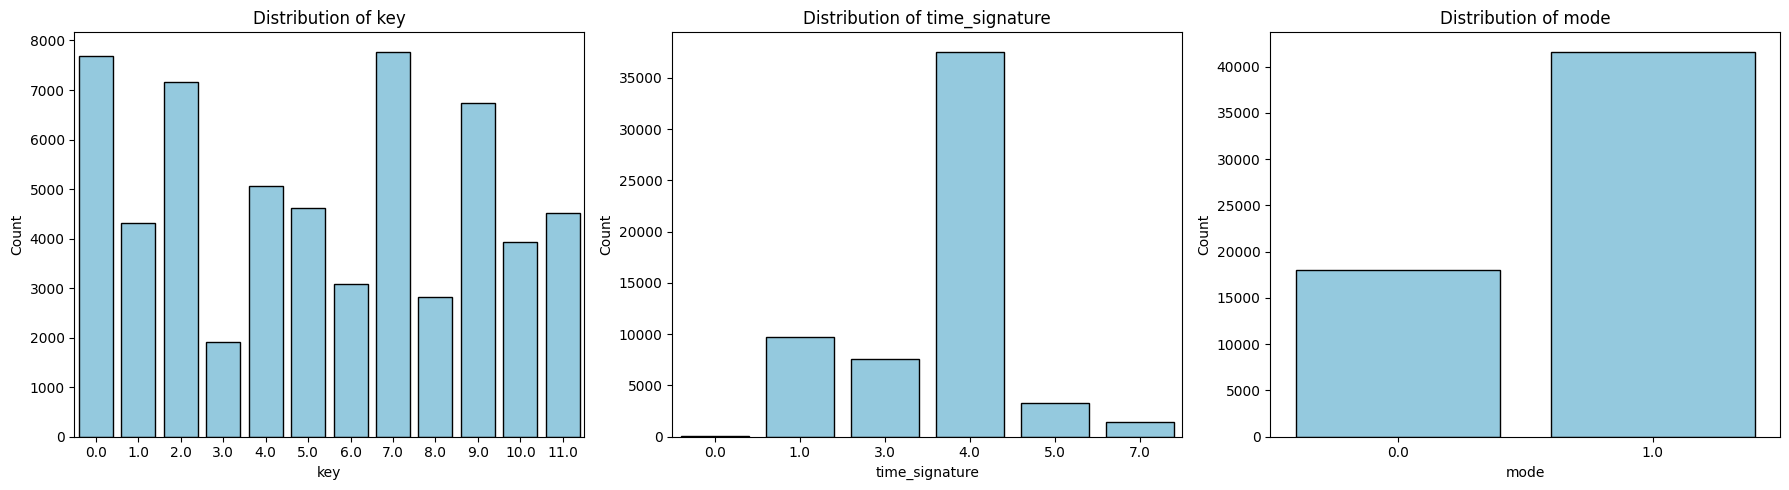

In [16]:
fig, axes = plt.subplots(1, 3, figsize=(6*3, 5))

for ax, col in zip(axes, categorical_features):
    sns.countplot(x=label_data[col], ax = ax, color="skyblue", edgecolor='black')
    ax.set_title(f"Distribution of {col}")
    ax.set_xlabel(col)
    ax.set_ylabel("Count")

plt.tight_layout()
plt.show()

In [22]:
df_features = label_data[numeric_features + categorical_features].drop(columns="loudness")

In [23]:
df_features

,tempo,duration,avg_timbre1,avg_timbre2,avg_timbre3,avg_timbre4,avg_timbre5,avg_timbre6,avg_timbre7,avg_timbre8,...,var_timbre6,var_timbre7,var_timbre8,var_timbre9,var_timbre10,var_timbre11,var_timbre12,key,time_signature,mode
0,155.007,246.33424,46.673067,14.613684,14.664215,0.176561,-9.346377,-12.341699,11.183382,7.405288,...,575.337671,322.068603,321.726029,232.700609,186.805303,181.938688,151.508011,9.0,1.0,1.0
1,148.462,189.80526,43.645377,-87.337150,41.051582,7.814770,-12.989848,-14.253599,6.126045,-2.448662,...,564.013736,510.177022,400.200186,365.119588,238.099708,197.933757,251.577525,4.0,1.0,0.0
2,112.909,158.19710,37.573538,-61.202030,28.760533,-13.788123,10.062347,-4.872030,-14.090243,5.580175,...,665.203452,535.775111,439.335059,486.822970,265.333860,447.097987,251.880724,10.0,1.0,0.0
3,117.429,250.22649,42.566615,17.217897,53.484213,1.564362,-8.884632,-13.088890,-9.762620,1.373769,...,378.382799,372.875044,231.941957,246.313305,168.400152,85.282462,339.897173,7.0,4.0,1.0
4,141.536,307.06893,40.976507,-13.609779,39.566169,-5.602033,-17.754819,-21.833261,-5.600732,2.291770,...,218.111796,304.862864,178.352161,440.478867,142.669283,81.061326,208.355152,9.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59595,88.951,348.96934,40.231725,46.282408,-13.655822,5.946664,14.348422,-2.672532,5.951254,6.642360,...,1655.677367,1000.603204,650.139870,487.150838,503.846148,641.508417,395.121718,11.0,4.0,1.0
59596,130.615,332.32934,43.813328,5.111750,-2.705070,-3.683494,2.478473,-3.406668,9.211850,3.222463,...,1375.104641,951.467238,621.927699,418.507034,409.707771,504.899788,350.913794,9.0,3.0,1.0
59597,88.976,182.04689,38.561170,21.603243,-43.954808,11.649718,-0.986997,-10.491520,-6.064987,-12.996223,...,1613.559675,1017.527699,1155.936991,422.885540,519.527734,538.895856,313.775934,3.0,4.0,1.0
59598,67.929,169.42975,41.280131,8.233834,-41.325696,-1.864784,7.786002,0.071631,-14.726294,-6.791047,...,1705.581355,1024.020625,1052.533278,533.349475,591.853048,598.054091,443.893807,0.0,3.0,1.0


### Target Variable Analysis

In [24]:
label_data.groupby('genre').size().sort_values(ascending=False)

genre
classic pop and rock     23895
folk                     13192
dance and electronica     4935
jazz and blues            4334
soul and reggae           4016
punk                      3200
metal                     2103
classical                 1874
pop                       1617
hip-hop                    434
dtype: int64

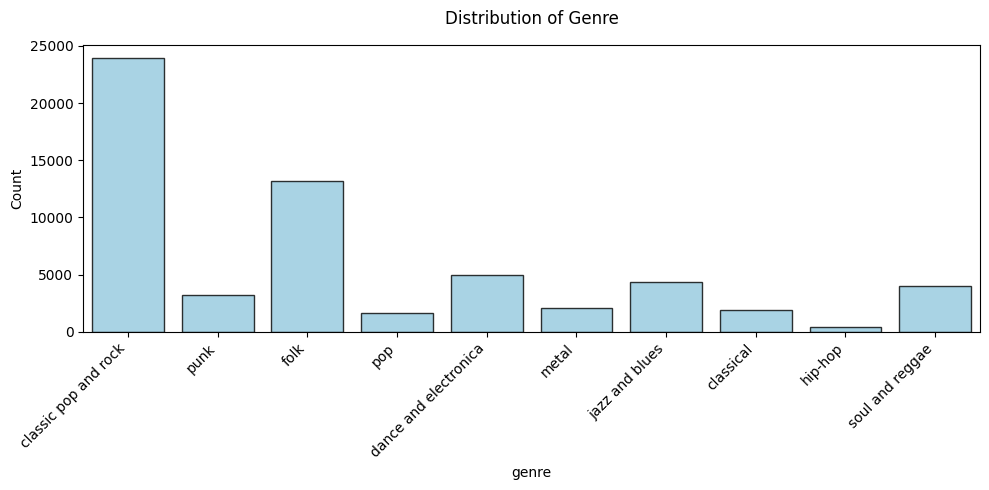

In [25]:
plt.figure(figsize=(10,5))
sns.countplot(x=label_data['genre'], color="skyblue", edgecolor='black', alpha=0.8)
plt.title(f"Distribution of Genre", pad=15)
plt.xlabel("genre")
plt.ylabel("Count")
plt.xticks(rotation=45, ha="right")

plt.tight_layout()
plt.show()

## Model Training

In [26]:
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from lightgbm import LGBMClassifier

In [27]:
X = df_features.copy()
y_text = label_data['genre']

le = LabelEncoder()
y = le.fit_transform(y_text)

print("Number of classes:", len(le.classes_))
print("Classes:", le.classes_)

Number of classes: 10
Classes: ['classic pop and rock' 'classical' 'dance and electronica' 'folk'
 'hip-hop' 'jazz and blues' 'metal' 'pop' 'punk' 'soul and reggae']


In [28]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)

Train shape: (47680, 29) Test shape: (11920, 29)


In [29]:
numeric_features_no_loudness = [c for c in numeric_features if c != "loudness"]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features_no_loudness),
        ('cat', categorical_transformer, categorical_features)
    ]
)

### Randome Forest Model

In [169]:
rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', RandomForestClassifier(random_state=42, n_jobs=-1, class_weight="balanced"))
])

rf_param_grid = {
    'clf__n_estimators': [200, 400],
    'clf__max_depth': [None, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

rf_cv = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=rf_param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Fitting Random Forest GridSearchCV:")
rf_cv.fit(X_train, y_train)

print("Best RF params:", rf_cv.best_params_)
print("Best RF CV score:", rf_cv.best_score_)

best_rf = rf_cv.best_estimator_

Fitting Random Forest GridSearchCV:
Fitting 3 folds for each of 16 candidates, totalling 48 fits


/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best RF params: {'clf__max_depth': None, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 400}
Best RF CV score: 0.600629147653953


In [172]:
# test results
y_pred_rf = best_rf.predict(X_test)
print("Random Forest on Test Set")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

Random Forest on Test Set
                       precision    recall  f1-score   support

 classic pop and rock       0.60      0.76      0.67      4779
            classical       0.74      0.78      0.76       375
dance and electronica       0.60      0.49      0.54       987
                 folk       0.62      0.61      0.62      2638
              hip-hop       0.56      0.11      0.19        87
       jazz and blues       0.64      0.44      0.52       867
                metal       0.74      0.66      0.70       421
                  pop       0.80      0.04      0.07       323
                 punk       0.68      0.46      0.55       640
      soul and reggae       0.54      0.40      0.46       803

             accuracy                           0.61     11920
            macro avg       0.65      0.47      0.51     11920
         weighted avg       0.62      0.61      0.60     11920



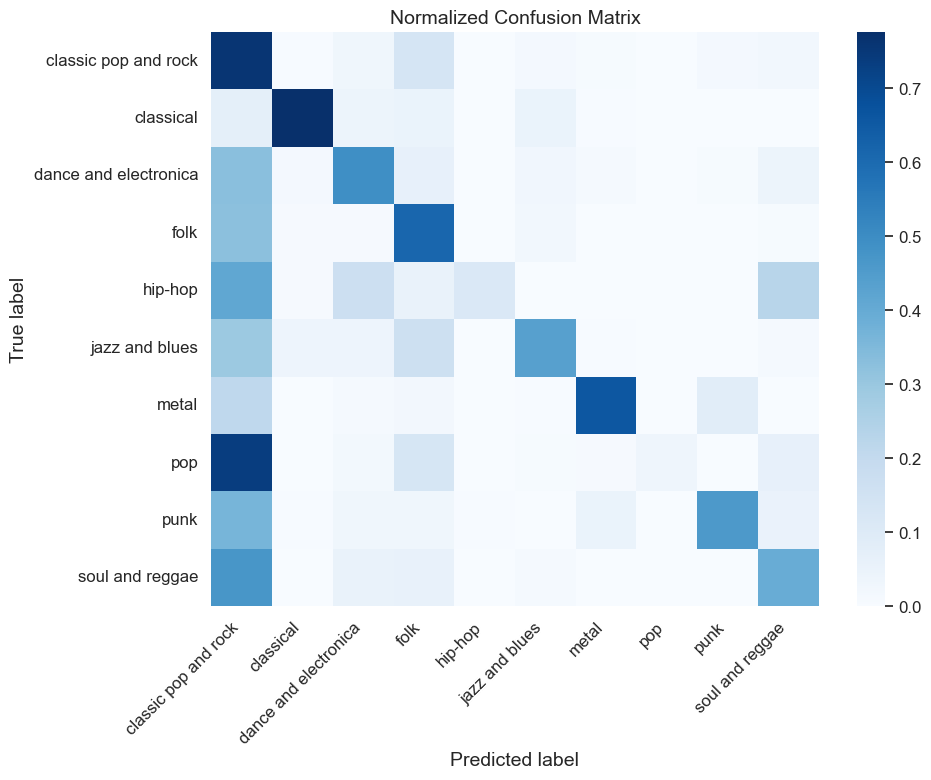

In [173]:
genre_labels = [
    "classic pop and rock",
    "classical",
    "dance and electronica",
    "folk",
    "hip-hop",
    "jazz and blues",
    "metal",
    "pop",
    "punk",
    "soul and reggae"
]

cm = confusion_matrix(y_test, y_pred_rf, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm, 
    annot=False,     
    xticklabels=genre_labels,
    yticklabels=genre_labels,
    cmap='Blues')

plt.xticks(rotation=45, ha='right')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)
plt.tight_layout()
plt.show()

### SVM Model

In [149]:
svm_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', SVC(probability=True))
])

svm_param_grid = {
    'clf__C': [1, 10],
    'clf__gamma': ['scale', 0.01],
    'clf__kernel': ['rbf'],
    'clf__max_iter': [2000]
}

svm_cv = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=svm_param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Fitting SVM GridSearchCV:")
svm_cv.fit(X_train, y_train)

print("Best SVM params:", svm_cv.best_params_)
print("Best SVM CV score:", svm_cv.best_score_)

best_svm = svm_cv.best_estimator_

Fitting SVM GridSearchCV:
Fitting 3 folds for each of 4 candidates, totalling 12 fits


/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packa

Best SVM params: {'clf__C': 10, 'clf__gamma': 'scale', 'clf__kernel': 'rbf', 'clf__max_iter': 2000}
Best SVM CV score: 0.5244332317661894


/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=2000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


In [151]:
# 在 test set 上评估 SVM
y_pred_svm = best_svm.predict(X_test)
print("SVM on Test Set")
print(classification_report(y_test, y_pred_svm, target_names=le.classes_))

SVM on Test Set
                       precision    recall  f1-score   support

 classic pop and rock       0.45      0.64      0.53      4779
            classical       0.78      0.78      0.78       375
dance and electronica       0.45      0.26      0.33       987
                 folk       0.38      0.32      0.35      2638
              hip-hop       0.39      0.28      0.32        87
       jazz and blues       0.60      0.31      0.41       867
                metal       0.76      0.67      0.71       421
                  pop       0.32      0.21      0.25       323
                 punk       0.55      0.38      0.44       640
      soul and reggae       0.36      0.21      0.26       803

             accuracy                           0.46     11920
            macro avg       0.50      0.41      0.44     11920
         weighted avg       0.46      0.46      0.45     11920



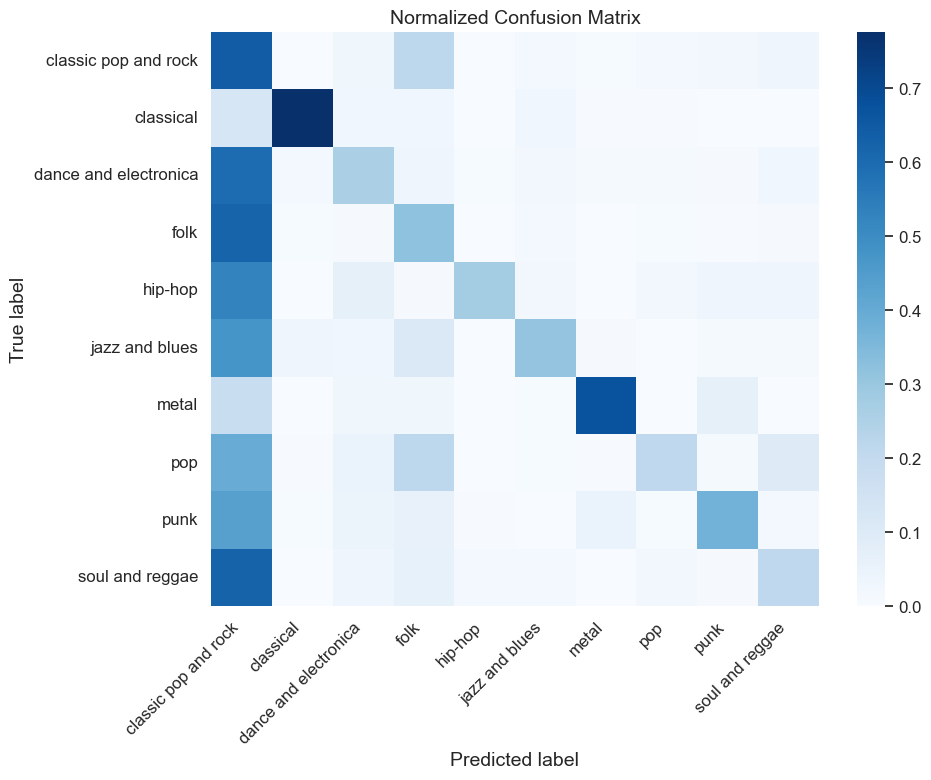

In [152]:
cm_svm = confusion_matrix(y_test, y_pred_svm, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm_svm, 
    annot=False,     
    xticklabels=genre_labels,
    yticklabels=genre_labels,
    cmap='Blues')

plt.xticks(rotation=45, ha='right')
plt.title("Normalized Confusion Matrix")
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)
plt.tight_layout()
plt.show()

### LightGBM Model

In [177]:
lgbm_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', LGBMClassifier(
        objective='multiclass',
        num_class=10,
        class_weight='balanced', 
        n_jobs=-1,
        random_state=42,
        verbosity=-1
    ))
])

lgbm_param_grid = {
    'clf__num_leaves': [31, 63, 127],
    'clf__learning_rate': [0.1, 0.05],
    'clf__n_estimators': [200, 400, 800],
    'clf__max_depth': [-1, 10]
}

lgbm_cv = GridSearchCV(
    estimator=lgbm_pipeline,
    param_grid=lgbm_param_grid,
    cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=42),
    scoring='accuracy',
    n_jobs=-1,
    verbose=1
)

print("Fitting LightGBM GridSearchCV: ")
lgbm_cv.fit(X_train, y_train)

print("Best LGBM params:", lgbm_cv.best_params_)
print("Best LGBM CV score:", lgbm_cv.best_score_)

best_lgbm = lgbm_cv.best_estimator_

Fitting LightGBM GridSearchCV: 
Fitting 3 folds for each of 36 candidates, totalling 108 fits


/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifi

Best LGBM params: {'clf__learning_rate': 0.1, 'clf__max_depth': -1, 'clf__n_estimators': 800, 'clf__num_leaves': 127}
Best LGBM CV score: 0.6334102446937012


In [178]:
y_pred_lgbm = best_lgbm.predict(X_test)

print("LightGBM on Test Set")
print(classification_report(y_test, y_pred_lgbm, target_names=le.classes_))

/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM on Test Set
                       precision    recall  f1-score   support

 classic pop and rock       0.61      0.80      0.69      4779
            classical       0.85      0.77      0.81       375
dance and electronica       0.63      0.52      0.57       987
                 folk       0.65      0.64      0.65      2638
              hip-hop       0.55      0.13      0.21        87
       jazz and blues       0.72      0.48      0.58       867
                metal       0.81      0.67      0.74       421
                  pop       0.80      0.11      0.20       323
                 punk       0.73      0.50      0.59       640
      soul and reggae       0.62      0.37      0.47       803

             accuracy                           0.64     11920
            macro avg       0.70      0.50      0.55     11920
         weighted avg       0.66      0.64      0.63     11920



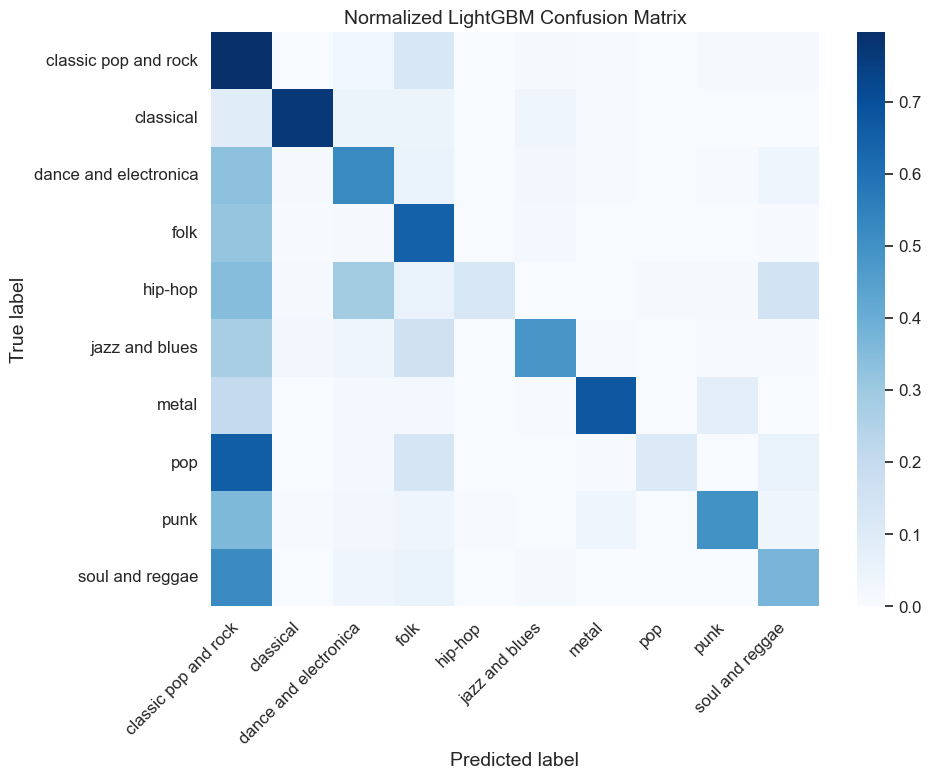

In [181]:
cm_lgbm = confusion_matrix(y_test, y_pred_lgbm, normalize='true')

plt.figure(figsize=(10, 8))
sns.heatmap(cm_lgbm, 
    annot=False,     
    xticklabels=genre_labels,
    yticklabels=genre_labels,
    cmap='Blues')

plt.xticks(rotation=45, ha='right')
plt.title("Normalized LightGBM Confusion Matrix")
plt.xlabel("Predicted label", fontsize=14)
plt.ylabel("True label", fontsize=14)
plt.tight_layout()
plt.show()

## SHAP Analysis

In [30]:
import shap

### Random Forest SHAP Analysis

In [31]:
# Retrain Random Forest Final Model Using Best Params
rf_best = RandomForestClassifier(
    n_estimators=400,
    max_depth=None,
    min_samples_split=5,
    min_samples_leaf=2,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', rf_best)
])

rf_pipeline.fit(X_train, y_train)

y_pred_rf = rf_pipeline.predict(X_test)

print("Random Forest (Best Params) on Test Set")
print(classification_report(
    y_test, y_pred_rf, target_names=le.classes_
))

Random Forest (Best Params) on Test Set
                       precision    recall  f1-score   support

 classic pop and rock       0.59      0.76      0.67      4779
            classical       0.74      0.77      0.76       375
dance and electronica       0.60      0.49      0.54       987
                 folk       0.62      0.61      0.62      2638
              hip-hop       0.48      0.11      0.19        87
       jazz and blues       0.64      0.45      0.52       867
                metal       0.74      0.64      0.69       421
                  pop       0.80      0.04      0.07       323
                 punk       0.68      0.46      0.55       640
      soul and reggae       0.52      0.39      0.44       803

             accuracy                           0.61     11920
            macro avg       0.64      0.47      0.50     11920
         weighted avg       0.62      0.61      0.60     11920



In [35]:
preprocessor = rf_pipeline.named_steps['preprocess']   # Same preprocess for Random Forest and LightGBM

X_train_trans = preprocessor.transform(X_train)

X_train_sample = X_train.sample(n=1000, random_state=42)
X_train_sample_trans = preprocessor.transform(X_train_sample)

feature_names = preprocessor.get_feature_names_out()

In [37]:
rf_clf = rf_pipeline.named_steps['clf']

explainer_rf = shap.TreeExplainer(rf_clf)

shap_values_rf = explainer_rf.shap_values(X_train_sample_trans)

In [75]:
import matplotlib.colors as mcolors
from matplotlib.colors import ListedColormap

genre_colors = {
    'classic pop and rock': '#1f77b4',
    'classical': '#ff7f0e',
    'dance and electronica': '#2ca02c',
    'folk': '#d62728',
    'hip-hop': '#9467bd',
    'jazz and blues': '#8c564b',
    'metal': '#e377c2',
    'pop': '#7f7f7f',
    'punk': '#bcbd22',
    'soul and reggae': '#17becf'
}
color_list = [genre_colors[c] for c in le.classes_]
genre_cmap = ListedColormap(color_list)

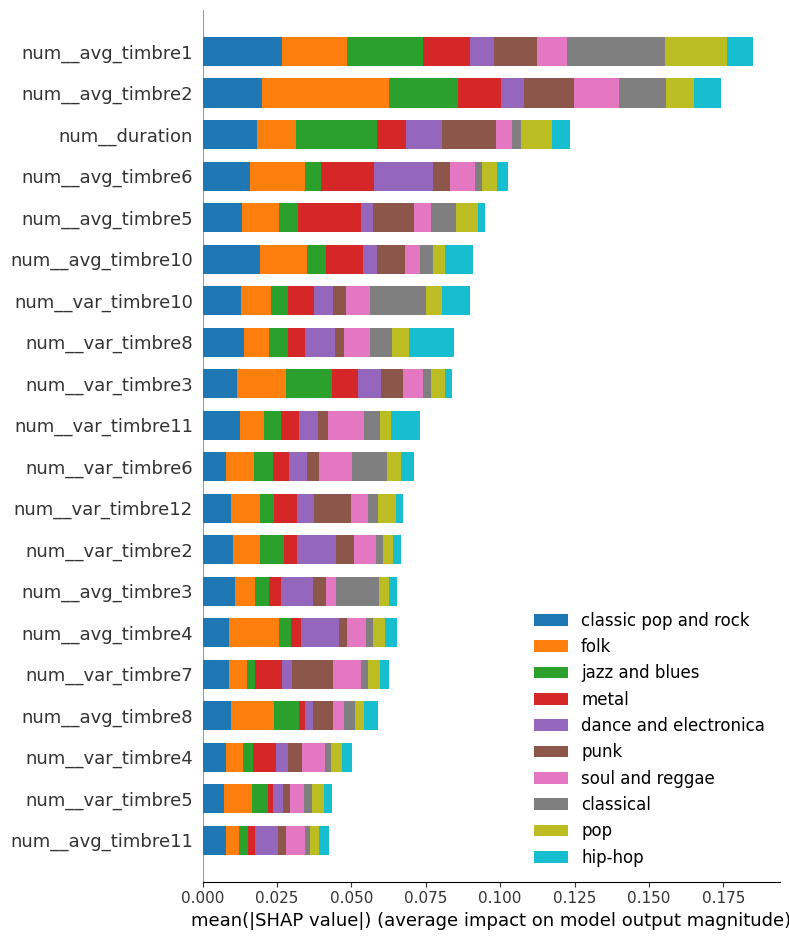

In [76]:
# (n_sample, n_feature, n_class) → list of array
shap_multiclass = [shap_values_rf[:, :, i] for i in range(len(le.classes_))]

shap.summary_plot(
    shap_multiclass,
    X_train_sample_trans,
    feature_names=feature_names,
    class_names=le.classes_,
    color=genre_cmap,
    show=True
)

### LightGBM Model

In [39]:
# Retrain LightGBM Final Model Using Best Params
lgbm_best = LGBMClassifier(
    learning_rate=0.1,
    max_depth=-1,
    n_estimators=800,
    num_leaves=127,
    random_state=42,
    n_jobs=-1
)

lgbm_pipeline = Pipeline(steps=[
    ('preprocess', preprocessor),
    ('clf', lgbm_best)
])

lgbm_pipeline.fit(X_train, y_train)

y_pred_lgbm = lgbm_pipeline.predict(X_test)

print("LightGBM (Best Params) on Test Set")
print(classification_report(
    y_test, y_pred_lgbm, target_names=le.classes_
))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 6668
[LightGBM] [Info] Number of data points in the train set: 47680, number of used features: 45
[LightGBM] [Info] Start training from score -0.913986
[LightGBM] [Info] Start training from score -3.459714
[LightGBM] [Info] Start training from score -2.491303
[LightGBM] [Info] Start training from score -1.508007
[LightGBM] [Info] Start training from score -4.922943
[LightGBM] [Info] Start training from score -2.621222
[LightGBM] [Info] Start training from score -3.344528
[LightGBM] [Info] Start training from score -3.606774
[LightGBM] [Info] Start training from score -2.924505
[LightGBM] [Info] Start training from score -2.697307
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further 

/Users/chuyuewu/Library/Python/3.9/lib/python/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM (Best Params) on Test Set
                       precision    recall  f1-score   support

 classic pop and rock       0.60      0.82      0.69      4779
            classical       0.86      0.74      0.80       375
dance and electronica       0.65      0.51      0.57       987
                 folk       0.65      0.63      0.64      2638
              hip-hop       0.67      0.11      0.20        87
       jazz and blues       0.74      0.44      0.56       867
                metal       0.83      0.65      0.73       421
                  pop       0.77      0.07      0.14       323
                 punk       0.76      0.49      0.59       640
      soul and reggae       0.67      0.33      0.44       803

             accuracy                           0.64     11920
            macro avg       0.72      0.48      0.54     11920
         weighted avg       0.66      0.64      0.62     11920



In [40]:
lgbm_clf = lgbm_pipeline.named_steps['clf']

explainer_lgbm = shap.TreeExplainer(lgbm_clf)

shap_values_lgbm = explainer_lgbm.shap_values(X_train_sample_trans)

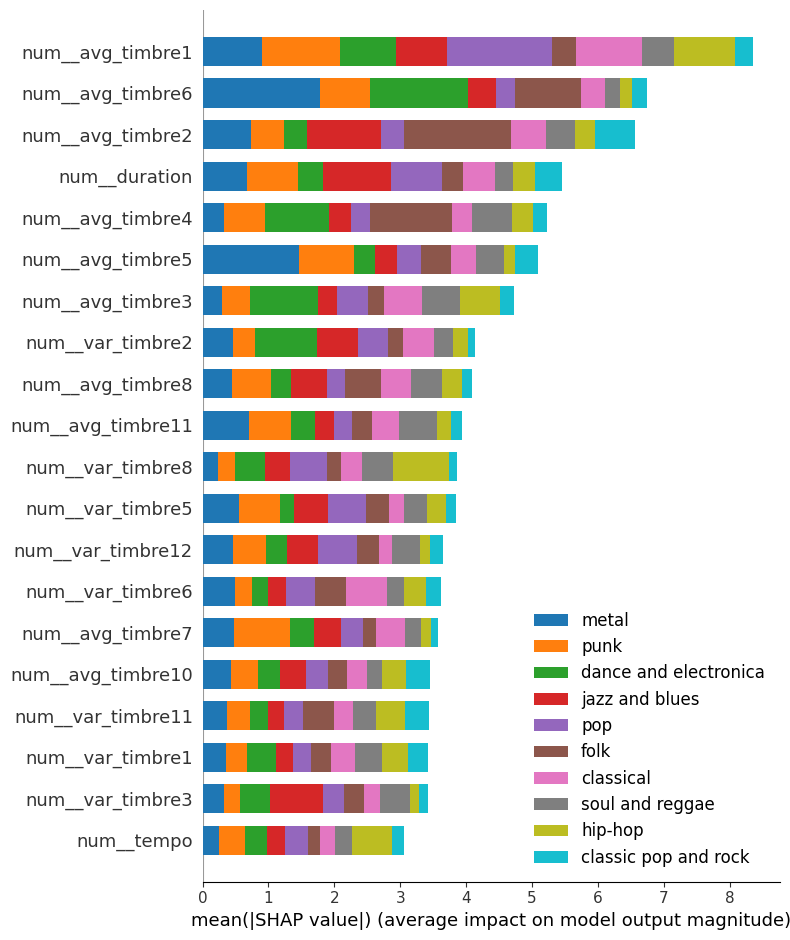

In [77]:
shap_multiclass = [shap_values_lgbm[:, :, i] for i in range(len(le.classes_))]

shap.summary_plot(
    shap_multiclass,
    X_train_sample_trans,
    feature_names=feature_names,
    class_names=le.classes_,
    color=genre_cmap,
    show=True
)